## Decision Tree Regressor End to End Project and Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# About the Dataset

Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


In [2]:
df_estate = pd.read_csv("U:/Data Science Masters Program/Daywise Practice/Decision Tree E2E Project and Deployment/Dataset/real_estate_data.csv")
df_estate.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [3]:
df_estate.shape, df_estate.size

((506, 13), 6578)

In [4]:
# getting insights of descriptive statistics from data

df_estate.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
df_estate.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# getting datatypes for each columns

df_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


<Axes: >

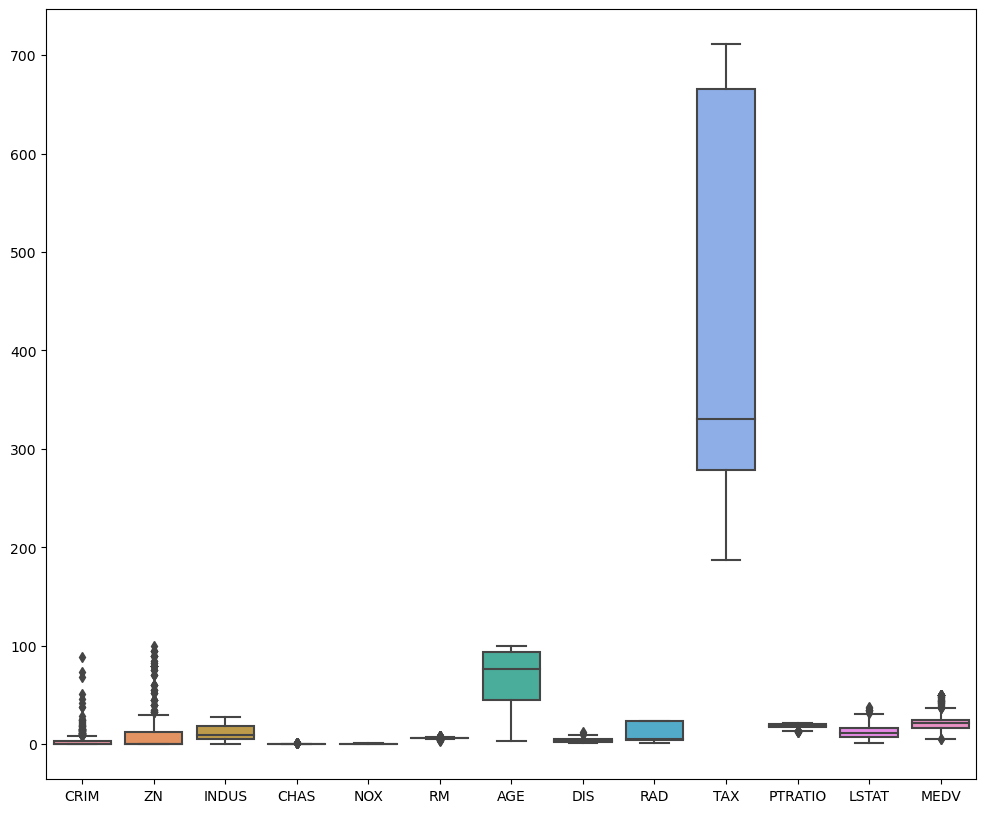

In [7]:
# to see if there are any outliers within dataset
plt.figure(figsize=(12,10))
sns.boxplot(df_estate)

<Axes: >

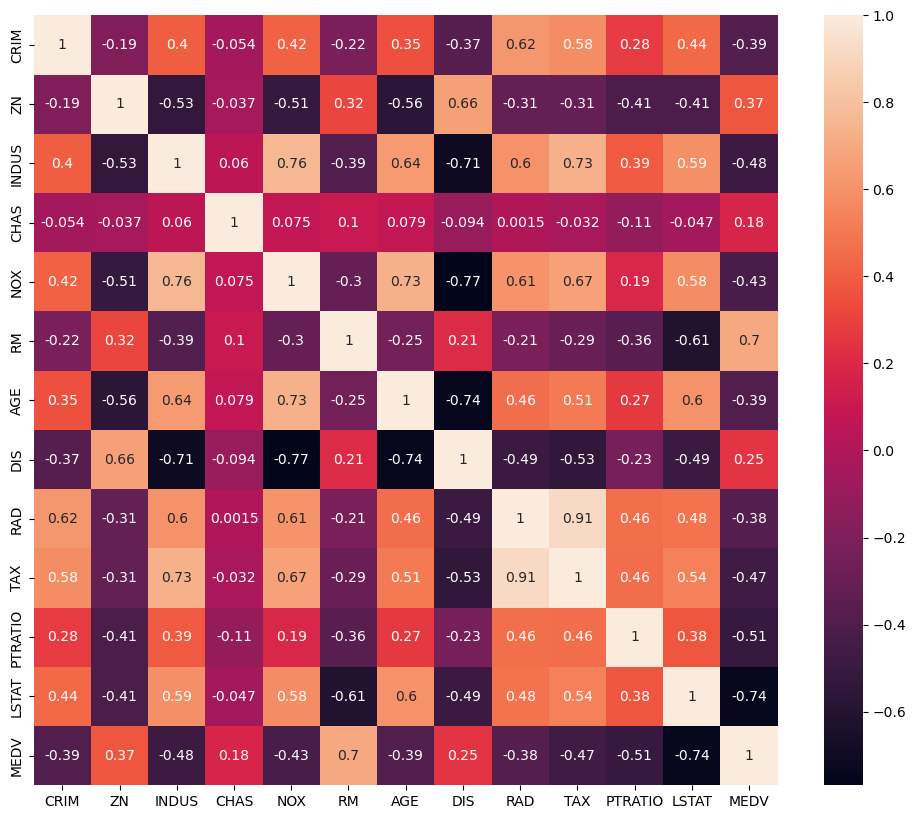

In [8]:
# to see correlation amongst features
plt.figure(figsize=(12,10))
sns.heatmap(df_estate.corr(), annot=True)

In [9]:
# check for null values

df_estate.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df_estate[df_estate.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,NaN,22.4


In [11]:
# dropping rows with null values

print(df_estate.shape)

df_estate.dropna(axis=0, inplace=True)

print(df_estate.shape)

(506, 13)
(394, 13)


In [12]:
df_estate.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
# check for duplicate values

df_estate.duplicated().any(), df_estate.duplicated().sum()

(False, 0)

In [14]:
df_estate.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [15]:
for column in df_estate.columns:
    print('Name of column : {} and Datatype of column : {}'.format(column, df_estate[column].dtype))

Name of column : CRIM and Datatype of column : float64
Name of column : ZN and Datatype of column : float64
Name of column : INDUS and Datatype of column : float64
Name of column : CHAS and Datatype of column : float64
Name of column : NOX and Datatype of column : float64
Name of column : RM and Datatype of column : float64
Name of column : AGE and Datatype of column : float64
Name of column : DIS and Datatype of column : float64
Name of column : RAD and Datatype of column : int64
Name of column : TAX and Datatype of column : int64
Name of column : PTRATIO and Datatype of column : float64
Name of column : LSTAT and Datatype of column : float64
Name of column : MEDV and Datatype of column : float64


In [16]:
# splitting dataset into dependent and target variables

X = df_estate.iloc[:,:-1]
y = df_estate.iloc[:,-1]

In [17]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [19]:
# splitting dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((315, 12), (79, 12), (315,), (79,))

## Create Decision Tree
Regression Trees are implemented using DecisionTreeRegressor from sklearn.tree

The important parameters of DecisionTreeRegressor are

criterion: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error

max_depth - The max depth the tree can be

min_samples_split - The minimum number of samples required to split a node

min_samples_leaf - The minimum number of samples that a leaf can contain

max_features: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
regressor = DecisionTreeRegressor()

In [23]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [24]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
y_pred = regressor.predict(X_test)
y_pred

array([24.8, 18.2, 23.1, 23.2, 19.7, 36.5, 22.2, 30.1, 28.7, 17.8, 19.7,
       44.8, 22.2, 14.4, 20.6, 28. , 17. , 17.5, 24.3, 23.2, 20.2, 18.3,
       17.8, 29.8, 27.5, 18. , 24.4, 29.1, 20.1, 24.4, 43.8, 12. , 27.5,
       17.7, 19.7, 22.2, 23.8, 20.9, 20.7, 23.8, 28.4, 48.5, 21.2, 28.4,
       30.3, 19.7, 23.7, 17.9, 15. , 24.4, 19.3, 19.3, 13.6, 23.2, 19.7,
       23.3, 50. , 19.8, 18.5, 20.6, 21.4, 22. , 14.1, 29. ,  7.4, 31.5,
       14.2, 27.5, 22.2, 16.5, 37.3, 32.7, 24.5, 20.6, 23.2, 44.8, 21.4,
       33.2, 12.7])

In [26]:
# to calculate confusion_matrix, accuracy_score, classification report

from sklearn.metrics import r2_score

In [27]:
r2_score(y_test, y_pred).round(2)

0.67

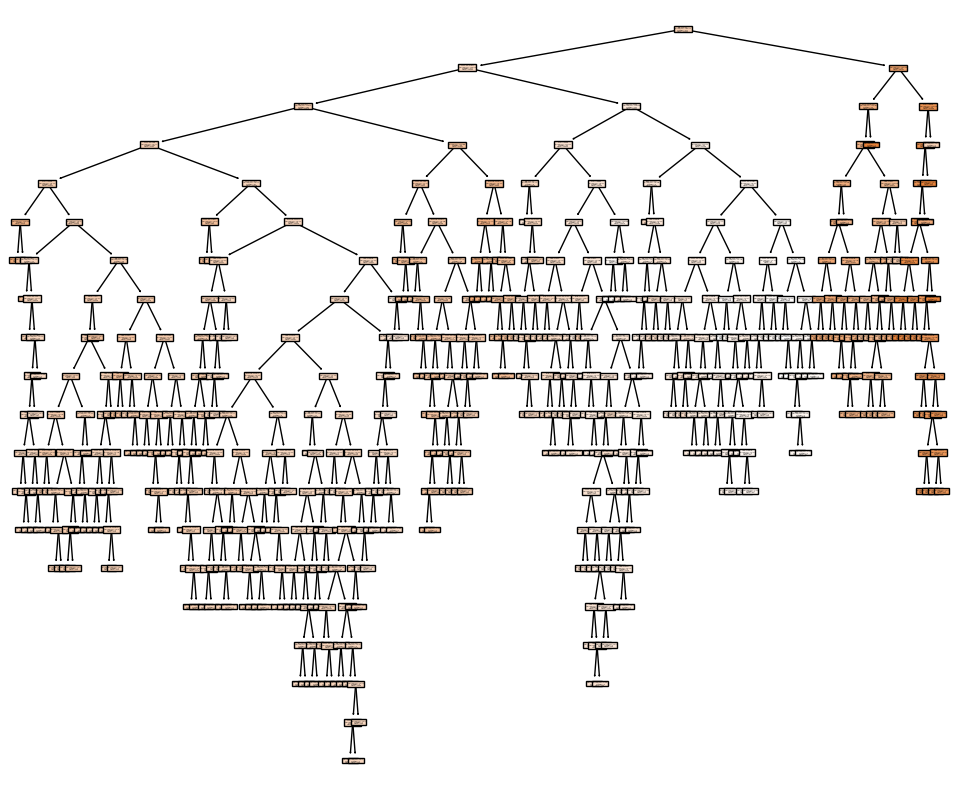

In [28]:
from sklearn import tree

plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True, feature_names=df_estate.columns)
plt.show()

## Hyperparameter Tuning with GridSearchCV

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [30]:
parameters ={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6],
  'max_features':['auto', 'sqrt', 'log2'],
  'ccp_alpha': [1.0,2.0,3.0,4.0,5.0],
 'random_state': [1,42],
}

In [31]:
regressor

DecisionTreeRegressor()

In [32]:
reg_grid = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5)

In [33]:
reg_grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 42],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [34]:
reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 42],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [35]:
reg_grid.best_params_

{'ccp_alpha': 1.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'random_state': 42,
 'splitter': 'best'}

In [36]:
reg_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=1.0, max_depth=3, max_features='auto',
                      random_state=42)

In [37]:
regressorcv=DecisionTreeRegressor(criterion='absolute_error',max_depth=3,max_features='auto',splitter='best',ccp_alpha=1.0,random_state=42)

In [38]:
regressorcv.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1.0, criterion='absolute_error', max_depth=3,
                      max_features='auto', random_state=42)

In [39]:
y_pred_cv=regressorcv.predict(X_test)
y_pred_cv

array([22. , 22. , 22. , 22. , 13.6, 35. , 22. , 35. , 22. , 13.6, 13.6,
       35. , 22. , 13.6, 22. , 22. , 13.6, 22. , 22. , 13.6, 22. , 22. ,
       13.6, 22. , 22. , 13.6, 22. , 22. , 22. , 22. , 35. , 13.6, 22. ,
       22. , 13.6, 22. , 22. , 22. , 22. , 22. , 22. , 35. , 22. , 22. ,
       35. , 13.6, 22. , 13.6, 22. , 22. , 22. , 22. , 13.6, 13.6, 13.6,
       22. , 35. , 13.6, 22. , 22. , 22. , 22. , 13.6, 22. , 13.6, 35. ,
       13.6, 35. , 22. , 13.6, 35. , 35. , 22. , 22. , 13.6, 35. , 22. ,
       35. , 13.6])

In [40]:
r2_score(y_test, y_pred_cv).round(2)

0.42

[Text(0.6, 0.8333333333333334, 'LSTAT <= 14.915\nabsolute_error = 6.554\nsamples = 315\nvalue = 20.9'),
 Text(0.4, 0.5, 'RM <= 6.803\nabsolute_error = 5.57\nsamples = 212\nvalue = 23.3'),
 Text(0.2, 0.16666666666666666, 'absolute_error = 2.648\nsamples = 158\nvalue = 22.0'),
 Text(0.6, 0.16666666666666666, 'absolute_error = 6.269\nsamples = 54\nvalue = 35.0'),
 Text(0.8, 0.5, 'absolute_error = 3.223\nsamples = 103\nvalue = 13.6')]

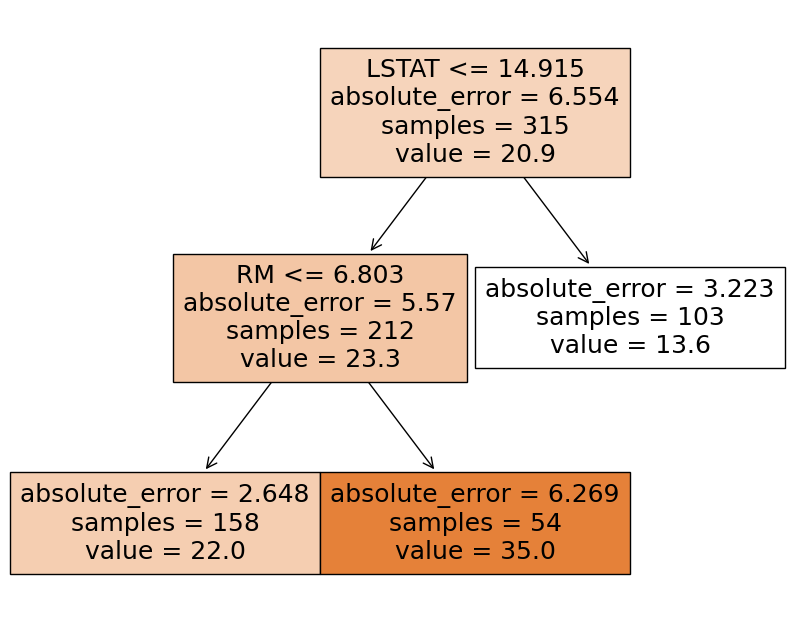

In [41]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(regressorcv,filled=True, feature_names=df_estate.columns)

### Our normal accuracy is greater than accuracy with GridSearchCV, means it is not necessary to always do hyperparameter tuning if accuracy is getting decreased than without hyperparameter tuning, but it is always a good practice to do it.

In [43]:
import pickle

file = open('U:/Data Science Masters Program/Daywise Practice/Decision Tree E2E Project and Deployment/Model/regressor.pkl','wb')
pickle.dump(regressor,file)
file.close()